In [7]:
from FeedForwardNN import Feedforward
from Toy_Datasets import two_clusters_gaussian, plot_decision_boundary
from Neural_Network import NLM,Classifier
import autograd.numpy as np
from sklearn.linear_model import LogisticRegression
from autograd import grad
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from autograd.misc.optimizers import adam
from Bayesian_pdf import get_log_prior, get_log_likelihood
from Hamiltonian_MC import hmc
from sklearn.model_selection import train_test_split
from pandas import get_dummies

In [8]:
def two_clusters_gaussian(params, n_samples, test_points=None):
    """
    :param params: should be a list of length K, K being the number of classes you wish to create
    for every class 0 <= k <=K-1, params[k] should be a dictionnary containing two keys: mean and covariance_matrix.
    The shapes expected for mean are D and covariance_matrix are D*D where D is the number of features for every
    datapoint.
    :param n_samples: number of samples you wish to create for every cluster
    :param test_points: OOD points
    :return: x of len(K*n_samples, n_features) and y of shape (K*n_samples). For both x and y, the features pertain
    sequentially to every class 0 <= k <= K-1
    """
    if params:
        if isinstance(params, list):  # params is a list
            K = len(params)
        else:  # params is a numpy array
            K = params.shape[0]	
        x = np.array([0, 0])
        for k, param in enumerate(params):
            param_k = params[k]
            try:
                mean_k, cov_k = param_k['mean'], param_k['covariance_matrix']
            except KeyError:
                raise KeyError('The parameters for class ' + str(k) + 'are not in the right dictionnary format. Please use mean and covariance_matrix')
            assert len(mean_k) == cov_k.shape[0] == cov_k.shape[1], 'Wrong shapes for the parameters of class ' + str(k)
            samples_class_k = np.random.multivariate_normal(mean_k, cov_k, n_samples)
            x = np.vstack((x, samples_class_k))
        y = np.array([[k] * n_samples for k in range(K)])
        return x[1:, :], np.array(y).flatten()
    else:
        raise BaseException().args

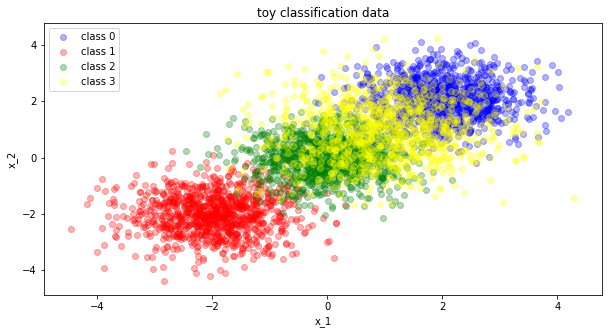

In [9]:
params_1 = {'mean': [2, 2], 'covariance_matrix': 0.5*np.eye(2)}
params_2 = {'mean': [-2, -2], 'covariance_matrix': 0.5 * np.eye(2)}
params_3 = {'mean': [0, 0], 'covariance_matrix': 0.5 * np.eye(2)}
params_4 = {'mean': [1, 1], 'covariance_matrix': 1 * np.eye(2)}

params = [params_1, params_2,params_3,params_4]
x, y = two_clusters_gaussian(params, 1000)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.3, color='blue', label='class 0')
ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.3, color='red', label='class 1')
ax.scatter(x[y == 2, 0], x[y == 2, 1], alpha=0.3, color='green', label='class 2')
ax.scatter(x[y == 3, 0], x[y == 3, 1], alpha=0.3, color='yellow', label='class 3')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data')
ax.legend(loc='best')
plt.show()

# test BNN
* 4 classes
* output dim = 4
* batch = 200

In [4]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


###neural network model design choices
width = 5
hidden_layers = 3
input_dim = 2
output_dim = 4

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = Feedforward(architecture, random=random)

In [5]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':15000, 
          'random_restarts':1}

#fit my neural network to minimize MSE on the given data
y_ = get_dummies(y).values
X_train, X_test, y_train, y_test = train_test_split(x, y_, train_size=0.8, random_state=random)
nn.fit(X_train.T, y_train.T, params)

#print(y_)
#X_train, X_test, y_train, y_test = train_test_split(x, y_, train_size=0.8, random_state=random)
#nlm.fit_MLE(X_train.T, y_train.T, params)

Iteration 0 lower bound 8.232378178742138; gradient mag: 2.6174911348238403
Iteration 100 lower bound 8.030684628194066; gradient mag: 0.1670446804342324
Iteration 200 lower bound 7.8728858340120045; gradient mag: 0.2843880137099083
Iteration 300 lower bound 7.7108136064152; gradient mag: 0.295775469453118
Iteration 400 lower bound 7.5174941942212925; gradient mag: 0.31271387304433307
Iteration 500 lower bound 7.313982867786646; gradient mag: 0.1511718039454418
Iteration 600 lower bound 7.266303099030206; gradient mag: 0.11208724409347069
Iteration 700 lower bound 7.23694041022988; gradient mag: 0.07964031466305412
Iteration 800 lower bound 7.216678814667699; gradient mag: 0.06473610397714538
Iteration 900 lower bound 7.202093006213852; gradient mag: 0.05499992843983211
Iteration 1000 lower bound 7.1899350757824685; gradient mag: 0.04957438797778881
Iteration 1100 lower bound 7.179805200506556; gradient mag: 0.04534142504319667
Iteration 1200 lower bound 7.171133490840602; gradient mag

Iteration 10200 lower bound 7.136748377066535; gradient mag: 0.006076834938021706
Iteration 10300 lower bound 7.136723887191049; gradient mag: 0.006106966382638046
Iteration 10400 lower bound 7.136700860754174; gradient mag: 0.0064150311389136044
Iteration 10500 lower bound 7.136667534548576; gradient mag: 0.00551236587904638
Iteration 10600 lower bound 7.136634508825848; gradient mag: 0.005950122630629666
Iteration 10700 lower bound 7.136597985482682; gradient mag: 0.005358513101769776
Iteration 10800 lower bound 7.136558117509837; gradient mag: 0.008160570236760114
Iteration 10900 lower bound 7.13650981063394; gradient mag: 0.010889775779512318
Iteration 11000 lower bound 7.136468224373558; gradient mag: 0.00568737619821515
Iteration 11100 lower bound 7.1364167716450995; gradient mag: 0.007645635253806103
Iteration 11200 lower bound 7.136363142678665; gradient mag: 0.010320379293191323
Iteration 11300 lower bound 7.136310314570437; gradient mag: 0.007992104754786757
Iteration 11400 l

In [6]:
#print(nn.forward(nn.weights,x.T)[0][0][:100],'\n')
#print(nn.forward(nn.weights,x.T)[0][0][100:200],'\n')
#print(nn.forward(nn.weights,x.T)[0][0][200:],'\n')
print(nn.forward(nn.weights,x.T))

[[2.14206075e-04 2.45135412e-55 4.00477617e-05 7.43170235e-04]
 [9.31753309e-04 3.64362236e-52 5.67378819e-08 5.76115517e-05]
 [9.70710078e-04 7.64481270e-53 5.68004466e-08 6.02919312e-05]
 ...
 [1.02744603e-04 1.08386789e-49 1.38302412e-04 7.50989848e-04]
 [1.78768736e-04 2.08618930e-55 5.82566791e-05 7.98255616e-04]
 [7.73898010e-05 1.34293216e-45 2.03573144e-04 6.88822789e-04]]


In [12]:
params_hmc={
       'num_samples':2000,
       'step_size':1e-2, 
       'L':20,
       'init': nn.weights,
       'burn':.1, 
       'thin':2,
}


def log_prior(W):
    Sigma=25*np.eye(nn.D)
    D_bayes=Sigma.shape[0]
    Sigma_inv= np.linalg.inv(Sigma)
    Sigma_det = np.linalg.det(Sigma)
    constant_W = -0.5 * (D_bayes * np.log(2 * np.pi) + np.log(Sigma_det))
    exponential_W = -0.5 * np.diag(np.dot(np.dot(W, Sigma_inv), W.T))
    log_p_W = constant_W + exponential_W
    return log_p_W

def log_likelihood(W):
    D_bayes=len(y.reshape((-1,1)))
    sigma_y=0.5
    constant = (-np.log(sigma_y) - 0.5 * np.log(2 * np.pi)) * D_bayes
    #print(constant)
    exponential = (-0.5 * sigma_y**-2 * np.sum((y.reshape((1, D_bayes)).T - (nn.forward(W, x.T)))**2, axis=1).flatten()).mean()
    #print(exponential)
    return constant + exponential

q=hmc(log_prior, log_likelihood, **params_hmc)

#log_likelihood(nn.weights)


IndexError: tuple index out of range

In [13]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

def HMC_Unit_test():
    # Generate a toy dataset for classification
    samples = 100
    class_0 = np.random.multivariate_normal([-1, -1], 0.5 * np.eye(2), samples)
    class_1 = np.random.multivariate_normal([1, 1], 0.5 * np.eye(2), samples)
    x = np.vstack((class_0, class_1))
    y = np.array([0] * 100 + [1] * 100)
    mean = np.zeros(3)
    cov = 10*np.eye(3)
    D = 3

    def log_likelihood(w):
        theta = sigmoid(w[-1] + np.dot(x, w[:-1]))
        return np.sum(np.log(theta[y==1])) + np.sum(np.log(1 - theta[y==0]))

    def log_normal_prior(W):
        logprior = -0.5 * (np.log(np.linalg.det(cov)) + D * np.log(2 * np.pi))
        logprior += -0.5 * np.dot(np.dot(W-mean, np.linalg.inv(cov)), (W-mean).T)
        return logprior
    
    log_prior = log_normal_prior
    log_likelihood = log_likelihood
    lr = LogisticRegression(C=1., penalty='l2', solver='saga', tol=0.1)
    lr.fit(x, y)
    position_init = np.hstack((lr.coef_.flatten(), lr.intercept_))
    position_init = position_init.reshape((1, 3))[0]
    samples = hmc(log_prior, log_likelihood, 5000,  1e-1, 20, position_init, 0.1, 1)
    q_=np.asarray(samples).T
    plt.plot(range(len(q_[0])),q_[0] , color='r')
    from statsmodels.graphics.tsaplots import plot_acf
    plot_acf(q_[0], lags=50)
    plt.show()
    #print(log_likelihood(position_init))
    return samples


100 : 0.71
200 : 0.69
300 : 0.67
400 : 0.6575
500 : 0.65
600 : 0.655
700 : 0.6642857142857143
800 : 0.6675
900 : 0.6655555555555556
1000 : 0.671
1100 : 0.6590909090909091
1200 : 0.6583333333333333
1300 : 0.6523076923076923
1400 : 0.6571428571428571
1500 : 0.6553333333333333
1600 : 0.66375
1700 : 0.6635294117647059
1800 : 0.6616666666666666
1900 : 0.6631578947368421
2000 : 0.6615
2100 : 0.6623809523809524
2200 : 0.6640909090909091
2300 : 0.668695652173913
2400 : 0.6679166666666667
2500 : 0.6672
2600 : 0.6680769230769231
2700 : 0.6685185185185185
2800 : 0.6703571428571429
2900 : 0.6737931034482758
3000 : 0.6723333333333333
3100 : 0.6738709677419354
3200 : 0.6728125
3300 : 0.6742424242424242
3400 : 0.6752941176470588
3500 : 0.6771428571428572
3600 : 0.6763888888888889
3700 : 0.6751351351351351
3800 : 0.6721052631578948
3900 : 0.6743589743589744
4000 : 0.67325
4100 : 0.6743902439024391
4200 : 0.6754761904761905
4300 : 0.673953488372093
4400 : 0.6747727272727273
4500 : 0.674
4600 : 0.673913

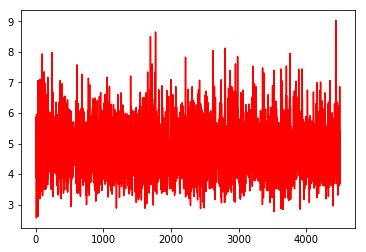

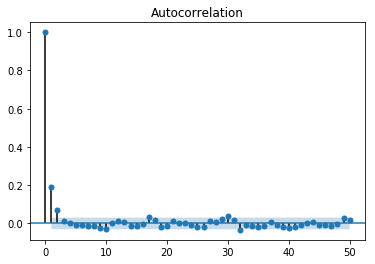

In [14]:
samples=HMC_Unit_test()

Text(0.5, 1.0, 'toy classification data with test data points and the linear boundary decision outputted by the posterior distribution for parameters')

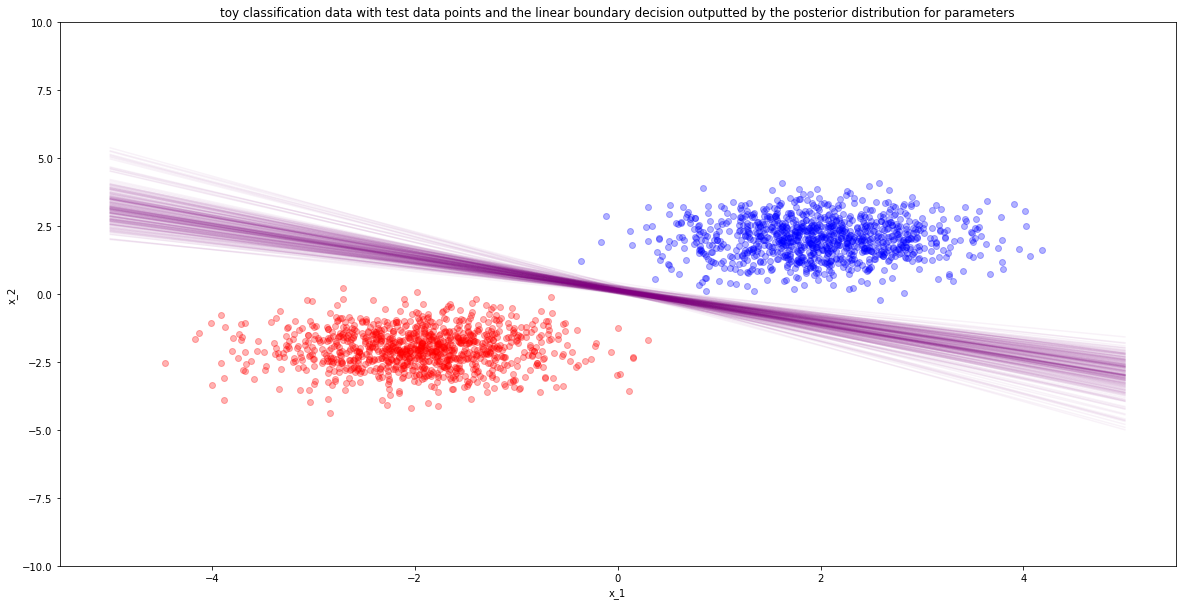

In [20]:

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for sample in samples:
    slope = lambda x :  -sample[1]/sample[0]*x - sample[2]/sample[0]
    if np.random.uniform()< 0.05:
        ax.plot(np.linspace(-5, 5, 100), [slope(xi) for xi in np.linspace(-5, 5, 100)], color='purple', alpha=0.05)
ax.plot(np.linspace(-5, 5, 100), [slope(xi) for xi in np.linspace(-5, 5, 100)], color='purple', label='Linear Boundary', alpha=0.2)
ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.3, color='red', label='class 1')
ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.3, color='blue', label='class 0')

#for i in range(len(test_points)):
#    pt = test_points[i]
#    if i == 0:
#        ax.scatter(pt[0], pt[1], alpha=1., s=50, color='black', label='test data')
#    else:
        #ax.scatter(pt[0], pt[1], alpha=1., s=50, color='black')
ax.set_ylim(-10, 10)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_title('toy classification data with test data points and the linear boundary decision outputted by the posterior distribution for parameters') 

In [21]:
def pymc3_sampling(D, sigma_in, out_last_hidden_layer, output_dim, out_y):
	"""
	INPUTS:

	OUTPUTS:
	"""
	with pm.Model() as replacing_HMC:  
	    # w has a prior: N(0,1) 
	    # Output dim number of bias
	    w = pm.Normal('w', mu=0, sigma=sigma_in, shape=(D+output_dim)) 
	    linear_combi = pm.math.dot(out_last_hidden_layer,w[output_dim:])+sum(w[:output_dim])
	    thetas = pm.Deterministic('theta', T.nnet.softmax(linear_combi))
	    # or thetas = pm.Deterministic('theta', pm.math.softmax(linear_combi))?
	    # Y commes from a Categorical(thetas)
	    y_obs = pm.Categorical('y_obs', p=thetas, observed=out_y)
	    trace = pm.sample(5000,chains=2)
	return trace


NameError: name 'samples' is not defined

120
(14400, 2)
(92,)


ValueError: cannot reshape array of size 43200 into shape (120,120)

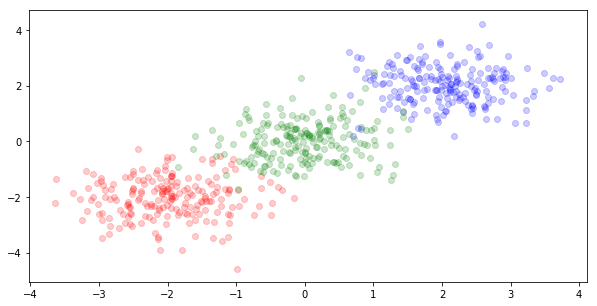

In [27]:
# Plot the decision boundary for the learned model
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
model=Bayesian_logistic_regression(nn.weights[0][-1],nn.weights[0][:-1],nn.forward,nn.weights)
ax = plot_decision_boundary(x, y, [model], ax, poly_degree=1,  shaded=True)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.legend(loc='best')
plt.show()

# NLM

In [22]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


###neural network model design choices
width = 5
hidden_layers = 3
input_dim = 2
output_dim = 4

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'prior': 'normal',
               'prior_parameters':{'mean': np.zeros(5), 'covariance_matrix': np.eye(5)},
               'likelihood': 'logistic',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nlm = NLM(architecture, random=random)

In [23]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':15000, 
          'random_restarts':1}

#fit my neural network to minimize MSE on the given data
#nlm.fit_MLE(x.T, y.reshape(1,-1), params)


y_ = get_dummies(y).values
X_train, X_test, y_train, y_test = train_test_split(x, y_, train_size=0.8, random_state=random)
nlm.fit_MLE(X_train.T, y_train.T, params)

Iteration 0 lower bound 1.7523741080820299; gradient mag: 1.9103595499789587
Iteration 100 lower bound 1.5268616104074568; gradient mag: 0.47094031232208705
Iteration 200 lower bound 1.250889189259894; gradient mag: 0.4047861507916339
Iteration 300 lower bound 1.0066377517664797; gradient mag: 0.4252738535157998
Iteration 400 lower bound 0.797372365980626; gradient mag: 0.37564434071867714
Iteration 500 lower bound 0.6694124451275522; gradient mag: 0.2813365651717606
Iteration 600 lower bound 0.5991005011604389; gradient mag: 0.1998414958041872
Iteration 700 lower bound 0.5580770039542178; gradient mag: 0.14605098447465736
Iteration 800 lower bound 0.532839349933157; gradient mag: 0.10666920235831995
Iteration 900 lower bound 0.5176685174497109; gradient mag: 0.08119929128864575
Iteration 1000 lower bound 0.505419030159819; gradient mag: 0.06144518103115518
Iteration 1100 lower bound 0.4879942208076558; gradient mag: 0.04903294473657112
Iteration 1200 lower bound 0.48158465761688146; g

Iteration 10100 lower bound 0.4507030362288304; gradient mag: 0.023193321250807045
Iteration 10200 lower bound 0.4506679234909274; gradient mag: 0.03993995756056659
Iteration 10300 lower bound 0.4506407524467162; gradient mag: 0.055909546372725175
Iteration 10400 lower bound 0.45061163189128356; gradient mag: 0.081715274928526
Iteration 10500 lower bound 0.4505682162068523; gradient mag: 0.06591405792267443
Iteration 10600 lower bound 0.45053510580070477; gradient mag: 0.06201239797687361
Iteration 10700 lower bound 0.450500824929731; gradient mag: 0.060274579069662756
Iteration 10800 lower bound 0.45048434824205635; gradient mag: 0.13421262794741953
Iteration 10900 lower bound 0.45044348773668597; gradient mag: 0.0880413057571972
Iteration 11000 lower bound 0.4504072176147193; gradient mag: 0.06225191187341111
Iteration 11100 lower bound 0.450382289111361; gradient mag: 0.09680733139655476
Iteration 11200 lower bound 0.4503503466118685; gradient mag: 0.10477189521646062
Iteration 1130

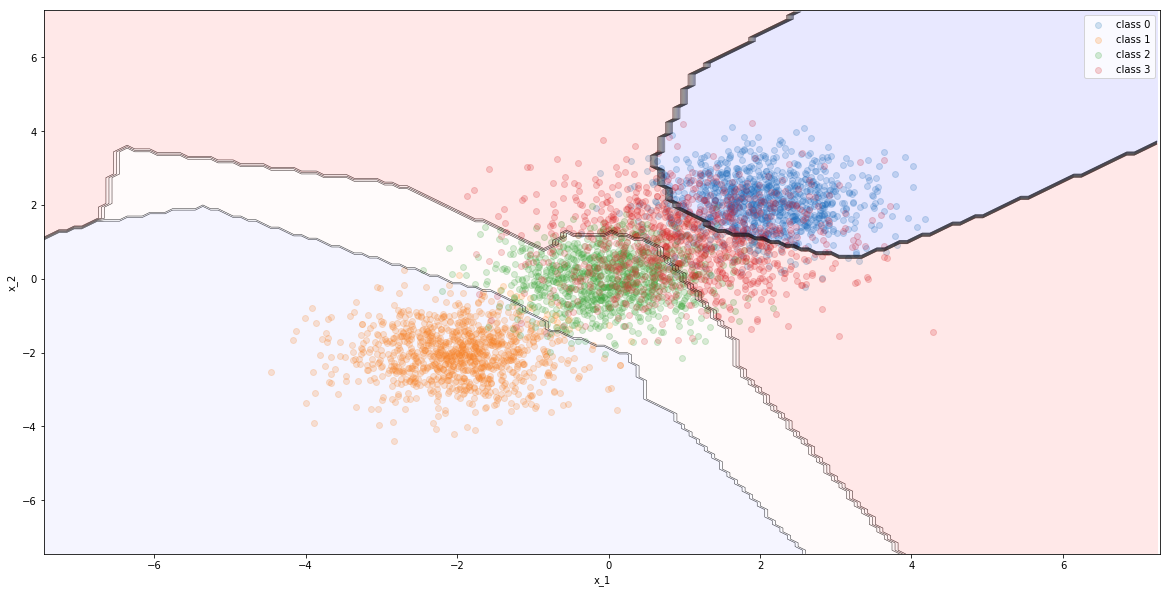

In [24]:
classifier = [Classifier(nlm.weights, nlm.forward)]
fig, ax = plt.subplots(1, figsize=(20, 10))
plot_decision_boundary(x, y_, classifier, ax)
plt.show()

In [126]:
import theano.tensor as T
import autograd.numpy as np
def pymc3_sampling(D, out_last_hidden_layer, output_dim, out_y):
    """
    INPUTS:
    D: dimension of the last hidden layer
    sigma_in: std of the prior (a normal, with mean 0)

    OUTPUTS:
    """
    with pm.Model() as replacing_HMC:  
        # w has a prior: N(0,1) 
        # Output dim number of bias
        w = pm.Normal('w', mu=0, tau=1, shape=(D*output_dim+output_dim)) 
        linear_combinations=[]
        for j in range(output_dim):
            dot=pm.math.dot(out_last_hidden_layer[0].T,w[j*D:j*D+D])+w[-j]
            print(dot,j)
            linear_combi = pm.Deterministic('s'+str(j),dot)
            linear_combinations.append(linear_combi)
        thetas = pm.Deterministic('theta', softmax(linear_combinations))
        # or thetas = pm.Deterministic('theta', pm.math.softmax(linear_combi))?
        # Y commes from a Categorical(thetas)
        y_obs = pm.Bernoulli('y_obs', p=thetas[0], observed=out_y)
        trace = pm.sample(1000,chains=2)

    return trace


In [127]:
from pymc3 import Model
import pymc3 as pm
#!pip freeze
from scipy._lib._util import _asarray_validated

#from scipy.special import softmax

traces=pymc3_sampling(5, nlm.forward(nlm.weights,x.T,partial=True), 4, y_train.T)


Elemwise{add,no_inplace}.0 0
Elemwise{add,no_inplace}.0 1
Elemwise{add,no_inplace}.0 2
Elemwise{add,no_inplace}.0 3


ValueError: object arrays are not supported

In [ ]:
w_0=[]
w_1=[]
w_2=[]
for i in range(len(traces['w'])):    
    w_0.append(traces['w'][i][0])        
    w_1.append(traces['w'][i][1])        
    w_2.append(traces['w'][i][2])
    
fig, ax=plt.subplots(1,1,figsize=(20,5))
ax.plot(range(len(w_0)), w_0, color='b')
ax.set_title('Trace plot')

In [118]:
def logsumexp(a, axis=None, b=None, keepdims=False, return_sign=False):
    """Compute the log of the sum of exponentials of input elements.
    Parameters
    ----------
    a : array_like
        Input array.
    axis : None or int or tuple of ints, optional
        Axis or axes over which the sum is taken. By default `axis` is None,
        and all elements are summed.
        .. versionadded:: 0.11.0
    keepdims : bool, optional
        If this is set to True, the axes which are reduced are left in the
        result as dimensions with size one. With this option, the result
        will broadcast correctly against the original array.
        .. versionadded:: 0.15.0
    b : array-like, optional
        Scaling factor for exp(`a`) must be of the same shape as `a` or
        broadcastable to `a`. These values may be negative in order to
        implement subtraction.
        .. versionadded:: 0.12.0
    return_sign : bool, optional
        If this is set to True, the result will be a pair containing sign
        information; if False, results that are negative will be returned
        as NaN. Default is False (no sign information).
        .. versionadded:: 0.16.0
    Returns
    -------
    res : ndarray
        The result, ``np.log(np.sum(np.exp(a)))`` calculated in a numerically
        more stable way. If `b` is given then ``np.log(np.sum(b*np.exp(a)))``
        is returned.
    sgn : ndarray
        If return_sign is True, this will be an array of floating-point
        numbers matching res and +1, 0, or -1 depending on the sign
        of the result. If False, only one result is returned.
    See Also
    --------
    numpy.logaddexp, numpy.logaddexp2
    Notes
    -----
    NumPy has a logaddexp function which is very similar to `logsumexp`, but
    only handles two arguments. `logaddexp.reduce` is similar to this
    function, but may be less stable.
    Examples
    --------
    >>> from scipy.special import logsumexp
    >>> a = np.arange(10)
    >>> np.log(np.sum(np.exp(a)))
    9.4586297444267107
    >>> logsumexp(a)
    9.4586297444267107
    With weights
    >>> a = np.arange(10)
    >>> b = np.arange(10, 0, -1)
    >>> logsumexp(a, b=b)
    9.9170178533034665
    >>> np.log(np.sum(b*np.exp(a)))
    9.9170178533034647
    Returning a sign flag
    >>> logsumexp([1,2],b=[1,-1],return_sign=True)
    (1.5413248546129181, -1.0)
    Notice that `logsumexp` does not directly support masked arrays. To use it
    on a masked array, convert the mask into zero weights:
    >>> a = np.ma.array([np.log(2), 2, np.log(3)],
    ...                  mask=[False, True, False])
    >>> b = (~a.mask).astype(int)
    >>> logsumexp(a.data, b=b), np.log(5)
    1.6094379124341005, 1.6094379124341005
    """
    a = _asarray_validated(a, check_finite=False)
    if b is not None:
        a, b = np.broadcast_arrays(a, b)
        if np.any(b == 0):
            a = a + 0.  # promote to at least float
            a[b == 0] = -np.inf

    a_max = np.amax(a, axis=axis, keepdims=True)

    if a_max.ndim > 0:
        a_max[~np.isfinite(a_max)] = 0
    elif not np.isfinite(a_max):
        a_max = 0

    if b is not None:
        b = np.asarray(b)
        tmp = b * np.exp(a - a_max)
    else:
        tmp = np.exp(a - a_max)

    # suppress warnings about log of zero
    with np.errstate(divide='ignore'):
        s = np.sum(tmp, axis=axis, keepdims=keepdims)
        if return_sign:
            sgn = np.sign(s)
            s *= sgn  # /= makes more sense but we need zero -> zero
        out = np.log(s)

    if not keepdims:
        a_max = np.squeeze(a_max, axis=axis)
    out += a_max

    if return_sign:
        return out, sgn
    else:
        return out

def softmax(x, axis=None):
    r"""
    Softmax function
    The softmax function transforms each element of a collection by
    computing the exponential of each element divided by the sum of the
    exponentials of all the elements. That is, if `x` is a one-dimensional
    numpy array::
        softmax(x) = np.exp(x)/sum(np.exp(x))
    Parameters
    ----------
    x : array_like
        Input array.
    axis : int or tuple of ints, optional
        Axis to compute values along. Default is None and softmax will be
        computed over the entire array `x`.
    Returns
    -------
    s : ndarray
        An array the same shape as `x`. The result will sum to 1 along the
        specified axis.
    Notes
    -----
    The formula for the softmax function :math:`\sigma(x)` for a vector
    :math:`x = \{x_0, x_1, ..., x_{n-1}\}` is
    .. math:: \sigma(x)_j = \frac{e^{x_j}}{\sum_k e^{x_k}}
    The `softmax` function is the gradient of `logsumexp`.
    .. versionadded:: 1.2.0
    Examples
    --------
    >>> from scipy.special import softmax
    >>> np.set_printoptions(precision=5)
    >>> x = np.array([[1, 0.5, 0.2, 3],
    ...               [1,  -1,   7, 3],
    ...               [2,  12,  13, 3]])
    ...
    Compute the softmax transformation over the entire array.
    >>> m = softmax(x)
    >>> m
    array([[  4.48309e-06,   2.71913e-06,   2.01438e-06,   3.31258e-05],
           [  4.48309e-06,   6.06720e-07,   1.80861e-03,   3.31258e-05],
           [  1.21863e-05,   2.68421e-01,   7.29644e-01,   3.31258e-05]])
    >>> m.sum()
    1.0000000000000002
    Compute the softmax transformation along the first axis (i.e., the
    columns).
    >>> m = softmax(x, axis=0)
    >>> m
    array([[  2.11942e-01,   1.01300e-05,   2.75394e-06,   3.33333e-01],
           [  2.11942e-01,   2.26030e-06,   2.47262e-03,   3.33333e-01],
           [  5.76117e-01,   9.99988e-01,   9.97525e-01,   3.33333e-01]])
    >>> m.sum(axis=0)
    array([ 1.,  1.,  1.,  1.])
    Compute the softmax transformation along the second axis (i.e., the rows).
    >>> m = softmax(x, axis=1)
    >>> m
    array([[  1.05877e-01,   6.42177e-02,   4.75736e-02,   7.82332e-01],
           [  2.42746e-03,   3.28521e-04,   9.79307e-01,   1.79366e-02],
           [  1.22094e-05,   2.68929e-01,   7.31025e-01,   3.31885e-05]])
    >>> m.sum(axis=1)
    array([ 1.,  1.,  1.])
    """

    # compute in log space for numerical stability
    return np.exp(x - logsumexp(x, axis=axis, keepdims=True))

In [17]:
params_hmc={
       'num_samples':2000,
       'step_size':1e-2, 
       'L':20,
       'init': nlm.weights,
       'burn':.1, 
       'thin':2,}

#sigmoid_probability=nlm.forward(nlm.weights, x.T)
#sigmoid_probability = np.clip(sigmoid_probability, 1e-15, 1 - 1e-15)
#bce = np.dot(np.log(sigmoid_probability),y.flatten())
#bce1 = sum([np.dot(np.log(sigmoid_probability)[:,:,i],y.flatten()[i]) for i in range(len(y.flatten()))])
#-sum([p[i]*log2(q[i]) for i in range(len(p))])
#print(bce,'\n',bce1)


nlm.forward(nlm.weights,x.T).shape


(4000, 4)

In [18]:
print(nlm.weights)
nlm.fit_NLM(x.T, y.reshape(1,-1),hmc,params_hmc)

[[ 1.72498663  0.2055907   0.57118473  0.42431817  1.97018417 -0.41926795
   1.23475955 -0.07985082 -0.64755823  0.53287767  1.06408124  2.34971722
   1.23971867  0.57830008  1.0709556   0.25745403  1.3914724  -0.74884999
   0.22855753 -0.8697386  -3.36423797 -0.10799488  1.02769984 -1.92479863
   1.46714059 -5.77708555 -1.18259771 -0.70150003  1.29462217  1.36946631
   0.22432362  0.27323446 -1.04014321 -2.3695494  -0.91147366  0.43431882
   1.2944919   0.919669   -1.22567693  1.17574308 -1.18827988 -0.51103635
   0.3493508   1.4101647  -1.58509425 -0.97044177 -0.98987544  0.34593027
  -4.51557028  0.34877728 -0.61180256  0.54540537  0.33492681  1.74226584
  -0.00993965  0.23743312 -0.11893141  0.41293176 -0.11408628 -0.49697948
  -0.89543647  0.07881674 -0.17659801  0.66181996  1.03446629 -0.03672571
  -0.87401336  1.01936603  0.40177383 -0.30715277  0.01662562  2.17193587
   2.09884151 -2.54082992  2.03128128 -1.59486196 -0.87013871 -1.98068692
   0.56759198 -1.90050926 -5.52966234 

ValueError: shapes (1,99) and (1,5,4000) not aligned: 99 (dim 1) != 5 (dim 1)